In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [2]:
flight=pd.read_excel('EastWestAirlines.xlsx')
flight.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [4]:
df_norm=norm_func(flight.iloc[:,1:])

In [5]:
k=list(range(10,20))
k
TWSS=[]
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
TWSS

[array([785.84453313]),
 array([756.37169613]),
 array([749.64592977]),
 array([730.51239266]),
 array([724.43723749]),
 array([700.4060706]),
 array([674.22928653]),
 array([676.51056646]),
 array([657.10195632]),
 array([646.06211833])]

([<matplotlib.axis.XTick at 0x27136344b20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

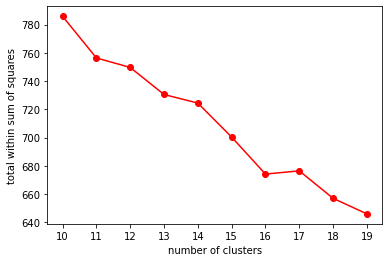

In [6]:
plt.plot(k,TWSS, 'ro-');plt.xlabel('number of clusters');plt.ylabel('total within sum of squares');plt.xticks(k)

In [7]:
model1=KMeans(n_clusters=14)
model1.fit(df_norm)

KMeans(n_clusters=14)